### Step 1. Load the Iris Dataset
 - The Iris dataset is a classic dataset available in the Scikit-learn library.
 - It contains the measurements of sepals and petals for three species of iris
   flowers: setosa, versicolor, and virginica.
 - Explanation:
      1. load_iris: Loads the dataset.
      2. DataFrame: Makes data handling and visualization easier by converting the
         dataset into a tabular format.
      3. Species mapping: Adds a column with species names for better readability.

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Iris Dataset
iris = load_iris()

In [3]:
# Create a DataFrame for easier handling and visualization
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 
                                                  1: 'versicolor', 
                                                  2: 'virginica'})

In [4]:
# Display first few rows with head function
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Exploration
 - Statistical Summary: Understand the range, mean, and standard deviation of each feature.
 - Missing Values: Ensures data quality by checking for null or missing entries.



In [5]:
# Statistical summary of dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())


Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


---

### Step 2. Visualize Relationships Between Features
  - Visualizations help in understanding the relationships between features and how they correlate with the target class.
  - Pairplot: Shows scatter plots between features and helps visualize clustering between species.
  - Heatmap: Displays the correlation between features, indicating which ones might be more significant for classification.
  - Feature Distribution: Visualizes the spread of each feature to detect skewness or outliers.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

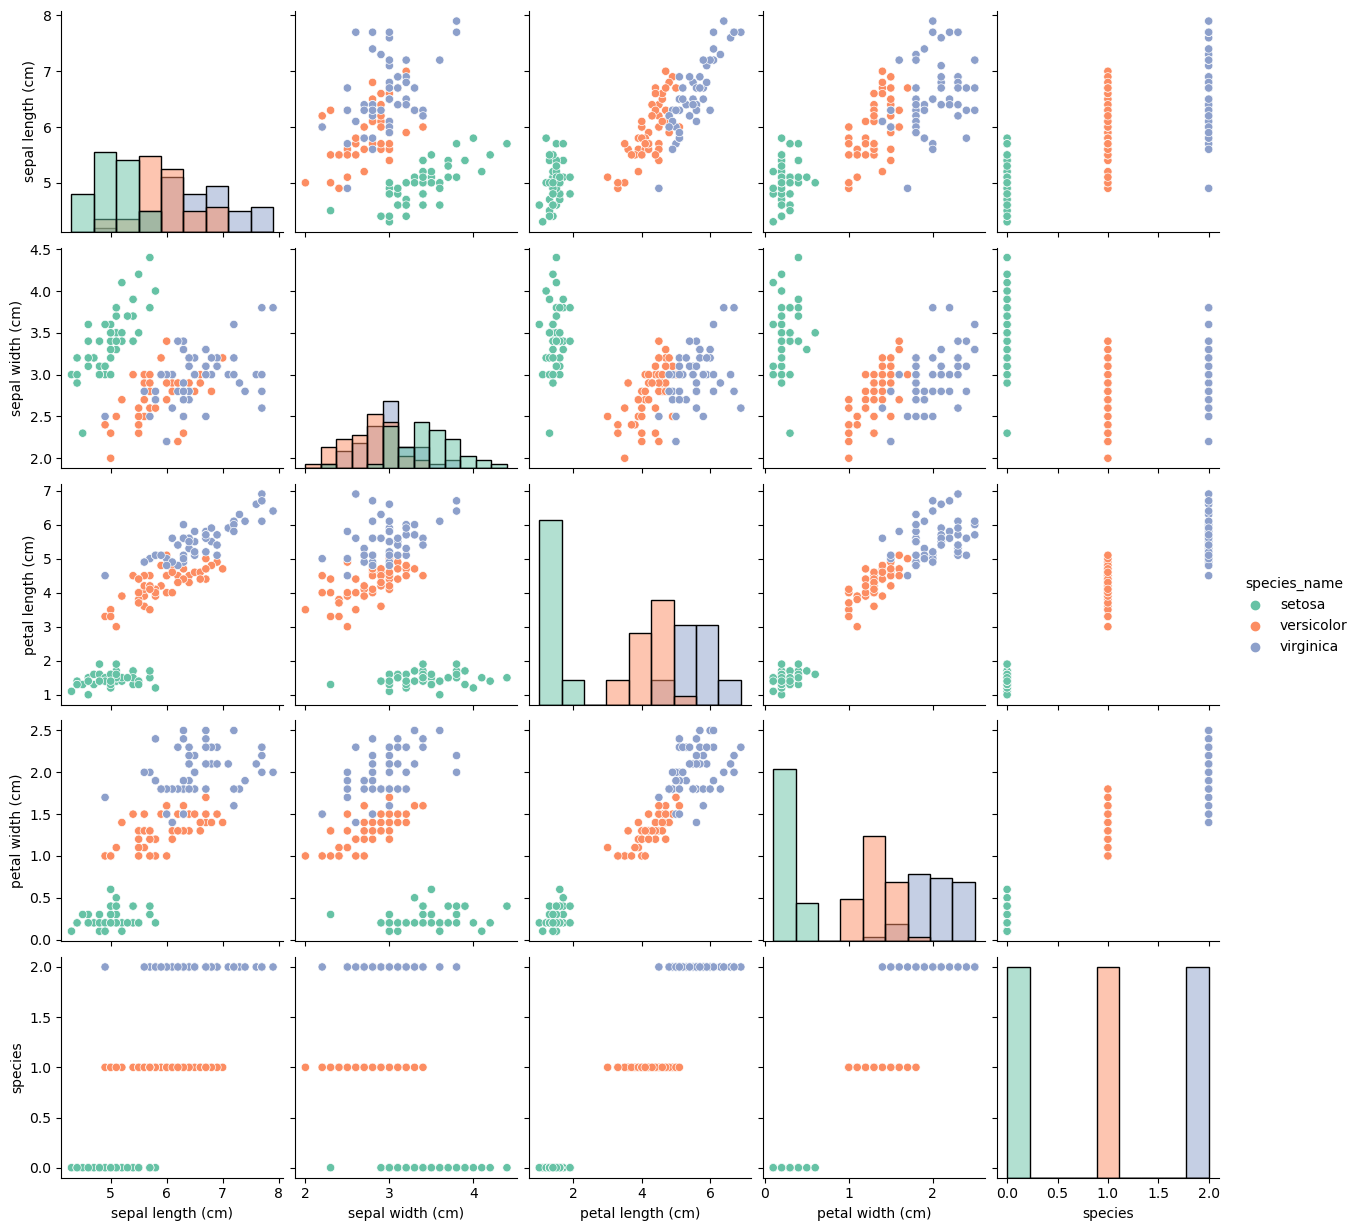

In [8]:
# Pairplot of feature
sns.pairplot(iris_df, hue = 'species_name', diag_kind = 'hist', palette='Set2')
plt.show()
             

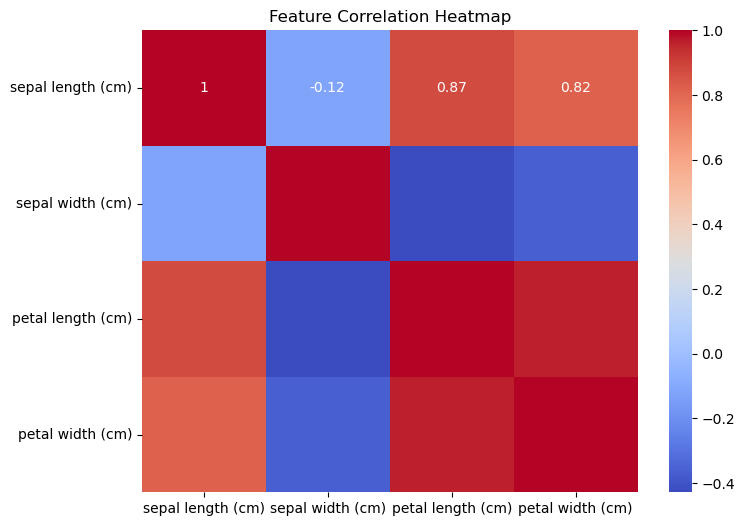

In [9]:
# Correlation Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(iris_df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

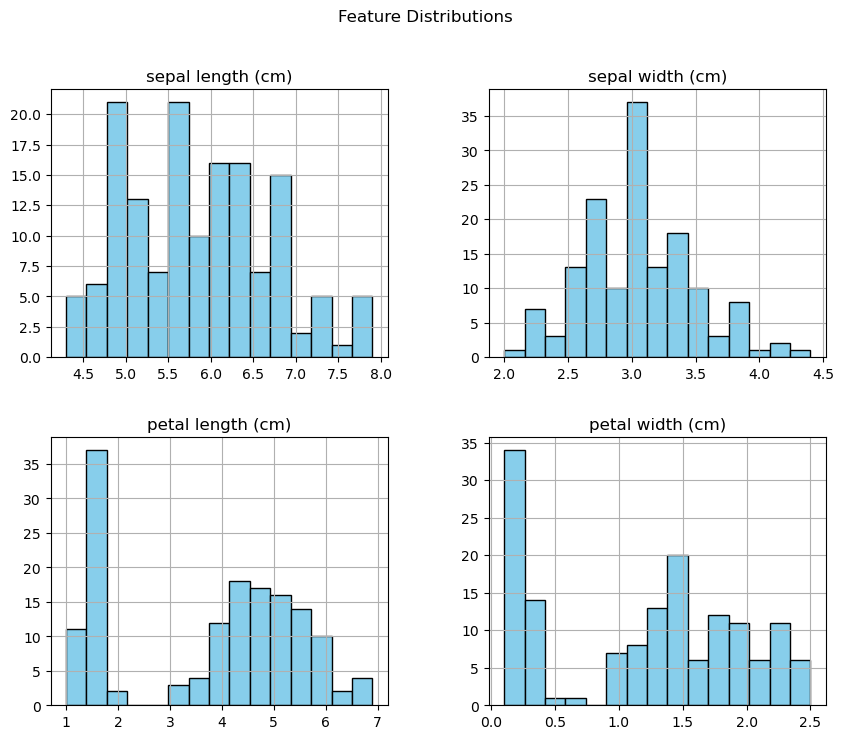

In [10]:
# Distribution of features
iris_df.iloc[:, :-2].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

---

### Step 3. Train a Classification Model
- We will train a Logistic Regression model as an example. You can replace it with K-Nearest Neighbors (KNN) for experimentation.
- Explanation:
     1. train_test_split: Splits the dataset into training and testing sets (80% training, 20% testing).
     2. Logistic Regression: A simple linear model suitable for classification problems.
     3. Accuracy: Evaluates how well the model performs on unseen data.

In [11]:
# Import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
# Splitting the dataset into training and testing sets
x = iris.data
y = iris.target
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# Train Logistics Regression model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
# Model Accuracy
accuracy = model.score(x_test, y_test)
print(f'Accuracy of the Logistic regression: {accuracy:.2}')

Accuracy of the Logistic regression: 1.0


### Feature Importance Analysis
   - For models like Logistic Regression, analyze the importance of features.
   - Explanation:
       1. Coefficients: Logistic Regression coefficients represent the contribution of each feature to the decision boundary.
       2. Visualization: Highlights which features are most important for classification.

In [15]:
# Feature importance for Logistic Regression
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': coefficients
})

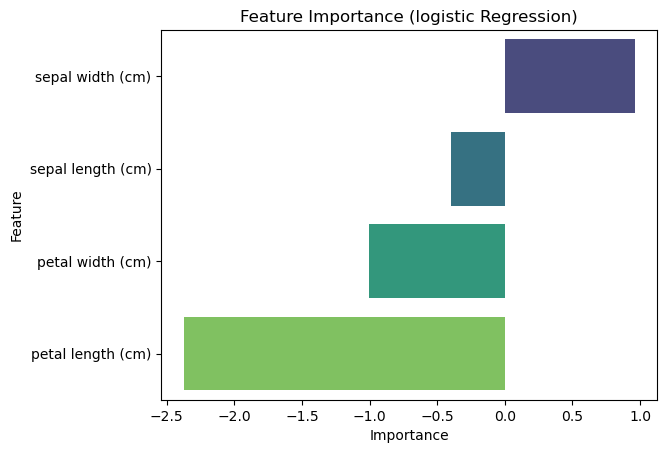

In [16]:
# Sort and plot
feature_importance = feature_importance.sort_values(by = 'Importance', 
                                                    ascending = False)
sns.barplot(x = 'Importance', 
            y = 'Feature', 
            data = feature_importance, 
            palette = 'viridis')
plt.title('Feature Importance (logistic Regression)')
plt.show()

---

### Step 4. Evaluate the Model
- Evaluation helps us understand the model's performance using metrics like precision, recall, and confusion matrix.
- Explanation:
   1. Classification Report: Includes precision, recall, and F1-score for each class.
   2. Confusion Matrix: Shows the count of correct and incorrect predictions for each class, providing insight into where the model might be struggling.

In [17]:
# Import the neccessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import numpy as pd

In [18]:
# make prediction
y_pred = model.predict(x_test)

In [19]:
# classification report
print("Classification Report: ")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



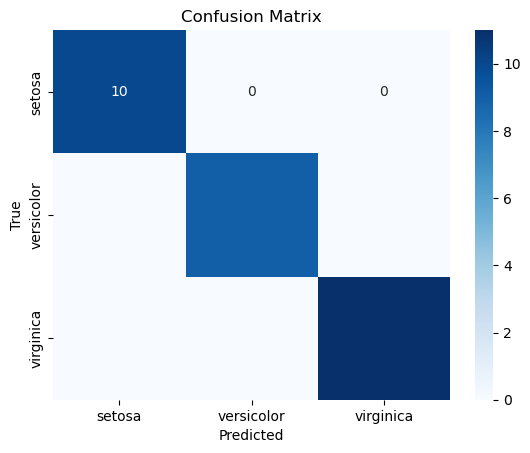

In [20]:
# Confusion report
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, 
            fmt = 'd', cmap = 'Blues', 
            xticklabels = iris.target_names,
            yticklabels = iris.target_names) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

---

## Step 5. Experiment with K-Nearest Neighbors(KNN)
- Try training a KNN model for comparison.
- Explanation:
     1. KNN: A non-parametric method that classifies based on the majority vote among the nearest neighbors.
     2. Comparison: Compare the accuracy of KNN with Logistic Regression.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

# Model accuracy
knn_accuracy = knn_model.score(x_test, y_test)
print(f'Accuracy of KNN: {knn_accuracy:.2f}')

Accuracy of KNN: 1.00


### Feature Engineering and Scaling
- Scaling ensures all features have the same scale, which is important for distance-based models like KNN.
- Explanation:
    1. StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
    2. Impact: Prevents features with larger ranges from dominating distance calculations in KNN or gradient-based methods.

In [22]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Update train-test split with scaled data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


### Hyperparameter Tuning
- Optimize the KNN model by finding the best value for k using cross-validation.
- Explanation:
     1. cross_val_score: Evaluates model performance using cross-validation.
     2. Optimal k: Selects the number of neighbors that maximizes accuracy.


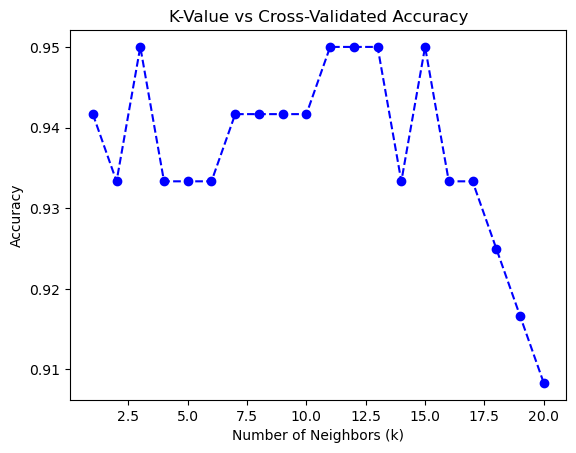

Best k: 3


In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Find the best k
k_values = range(1, 21)
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    knn_scores.append(scores.mean())

# Plot k vs accuracy
plt.plot(k_values, knn_scores, marker='o', linestyle='--', color='b')
plt.title('K-Value vs Cross-Validated Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

# Select the best k
best_k = k_values[np.argmax(knn_scores)]
print(f'Best k: {best_k}')


---

## Step 6. Model Comparison
- Compare the performance of Logistic Regression and KNN using precision, recall, and F1-score.
- Explanation:
    1. F1 Score: Combines precision and recall into a single metric, useful for imbalanced datasets.
    2. Comparison: Determines which model is more effective for this dataset.

In [25]:
from sklearn.metrics import f1_score

# Evaluate both models
models = {'Logistic Regression': model, 'KNN': knn_model}
for name, m in models.items():
    y_pred = m.predict(x_test)
    print(f"{name} F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")


Logistic Regression F1 Score: 0.17
KNN F1 Score: 0.17


In [26]:
!jupyter nbconvert --to pdf Iris_Flower_Classification.ipynb

[NbConvertApp] Converting notebook Iris_Flower_Classification.ipynb to pdf
[NbConvertApp] Support files will be in Iris_Flower_Classification_files\
[NbConvertApp] Making directory .\Iris_Flower_Classification_files
[NbConvertApp] Writing 49809 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 462631 bytes to Iris_Flower_Classification.pdf
